## Machine Learning - Ex.8


Submitted by: [Daniel Shalom 304835689]

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


## K-means

Implement the K-means algorithm:

Your function should get the $n\times d$ samples matrix (one in each row) and the number of clusters K.

Init the K cluster centers $\mu_j,\ \ j=0,..,K-1$ with a random choice out of the K samples.

Then iterate the algorithm's two steps, until convergence (no change in the samples assignments):

**step 1:** sample assignment:

**step 2:** update cluster centers:

Your function should return:
1. a vector $y\in R^n$ of the final assingments:
$$y_i\in\{0,1,..,K-1\}$$
2. a matrix C (of size $k\times d$) with all the clusters centers (one in each row).
3. The total cost $J$ of the final solution.

Test your function on the simple 2-D data below.


hint: matplotlib's *scatter* plot might come handy for visualization: <https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html>



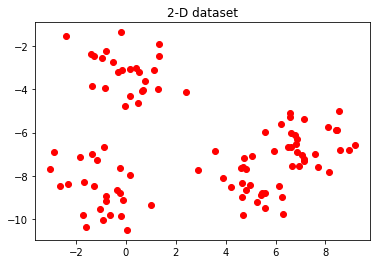

In [4]:
data=np.loadtxt('samples2D.csv', delimiter=',')

plt.plot(data[:,0],data[:,1],'or')
plt.title('2-D dataset')
plt.show()

(100,)


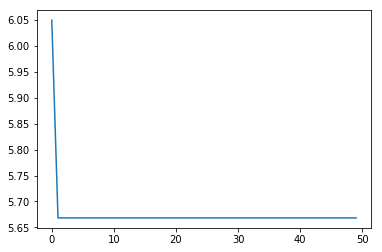

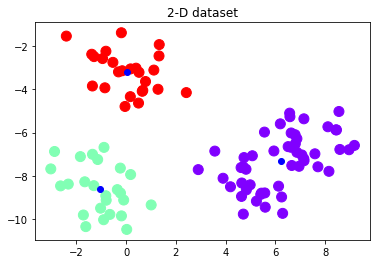

In [5]:
def kmean(data, K):

    itr = 50
    N = X.shape[0]
    mue = data[np.random.randint(0, N - 1, size=K)]
    r = np.zeros((data.shape[0], K))
    J = np.zeros((itr,))


    for ii in range(itr):
        G = 0
        for i in range(data.shape[0]):
            # step1
            for j in range(K):
                r[i, j] = np.sum((data[i, :] - mue[j, :]) ** 2)
            t = np.amin(r[i, :])
            ti = np.argmin(r[i, :])
            G += r[i, ti]
            w = (np.where(r[i, :] != t))
            r[i, [w[0]]] = 0
            r[i, ti] = 1
        J[ii] = G
        for b in range(K):
            tmp = 0

            for a in range(data.shape[0]):
                tmp += r[a, b] * data[a, :]

            tmp1 = np.sum(r[:, b])
            mue[b, :] = tmp / tmp1


    y = np.linspace(1, 100, 100)
    for i in range(data.shape[0]):
        j = np.argmax(r[i, :])
        y[i] = j
    C = mue

    return y, C, J

X = data
[y, C, J] = kmean(data, 3)

y = y + 1
print(y.shape)
plt.plot(np.log(J))
plt.show()
plt.scatter(data[:, 0], data[:, 1], 100, y, cmap=plt.cm.rainbow)
plt.plot(C[:, 0], C[:, 1], 'ob')
plt.title('2-D dataset')
plt.show()

### Choosing K

In order to try and avoid local minima, you will run the k-means algorithm $N=100$ times, each time with a different random initialization, and return the results (y, C, J) of the best run (minimal J).

In order to choose the number of clusters K, run your function on the data, each time with a different value of K (try K=1,..,8).

Plot the final result for each K (scatter plot of the data with each cluster marked by a different color).

Finally, plot the final J value as a function of K, in order to choose the K.

In [6]:
def kmeans_repeat(X, K, N=100):    
#     y4=0
#     J=0
    c1=0
    # (should call 'kmeans' N times and pick the best solution)
    for i in range (N):        
        [y1, C1, J1]=kmean(X, K)
      
        if(i==0):
            y4=y1
            C=C1
            J=J1
        if J1[-1]<J[-1]:
#             y4=None
            y4=y1
            C=C1
            J=J1
        
    return y4, C1, J


num of means 2


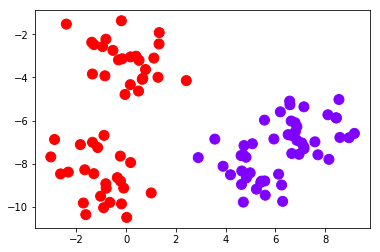

num of means 3


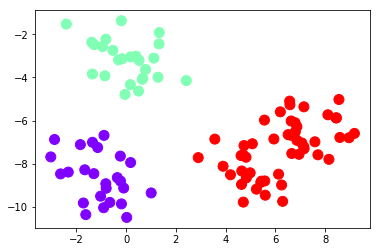

num of means 4


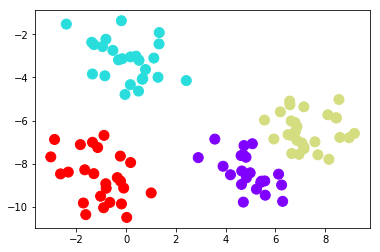

num of means 5


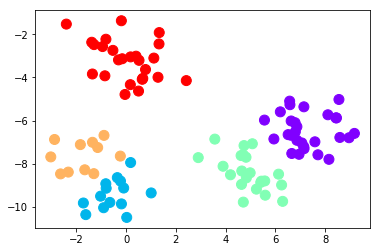

num of means 6


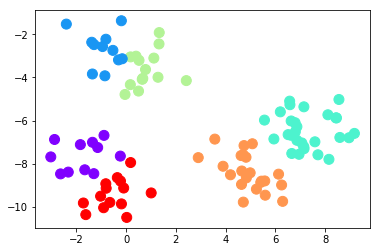

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


num of means 7


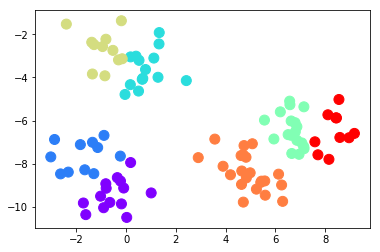

num of means 8


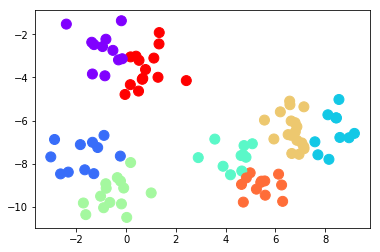

number of means with the best result:  8


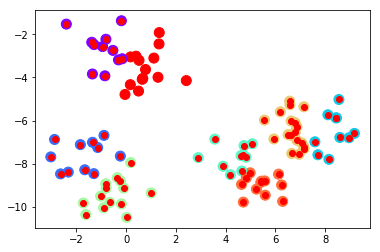

In [7]:
X=data
# y3=0;C=0;J=0;j=0
for i in range (2,9):
    y, C1, J1=kmeans_repeat(data, i)
    plt.figure(i)
    print('num of means',i)
    plt.scatter(X[:,0], X[:,1], 100, y, cmap=plt.cm.rainbow)
#     plt.plot(data[:,0],data[:,1],'or')
#     plt.plot(C1[:,0],C1[:,1],'ob')
    plt.show()
    if(i==2):        
            y3=y
            C=C1
            J=J1
            j=i
    if J1[-1]<J[-1]:            
            y3=y
            C=C1
            J=J1
            j=i
plt.scatter(X[:,0], X[:,1], 100, y3, cmap=plt.cm.rainbow)
plt.plot(data[:,0],data[:,1],'or')
# plt.plot(C[:,0],C[:,1],'ob')
print('number of means with the best result: ', j)
plt.show()


### Higher dimensional data

Load the data points from the file 'samples.csv'. 

Each 20-D data point is visualized as a single line in the plot.

Try to cluster the data points into K=1,2,...,8 clusters (as before). 

Plot J as a function of K, and choose a suitable value for K.

Use the results to visualize the data (each group in different color).




(100, 20)


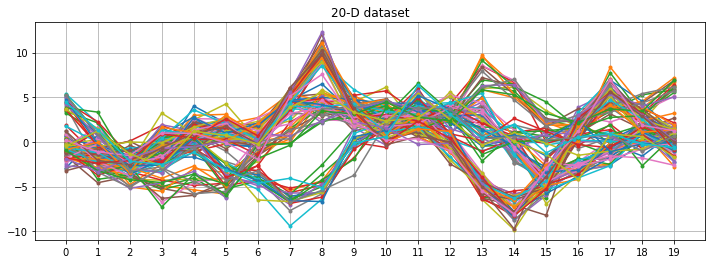

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


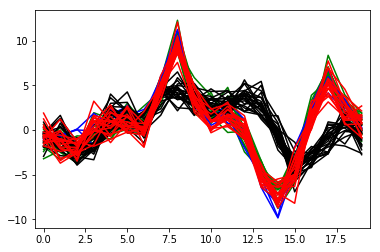

<function matplotlib.pyplot.show>

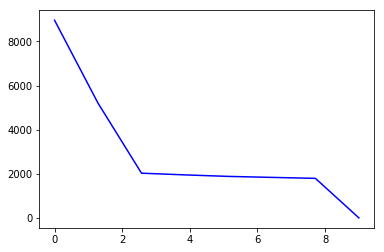

In [8]:
data=np.loadtxt('samples20D.csv', delimiter=',')

print(data.shape)
n,d = data.shape

plt.figure(figsize=(12,4))

plt.plot(data.T,'.-')
plt.title('20-D dataset')
plt.xticks(np.arange(20))
plt.grid()
plt.show()
#################
X=data
j_tot=np.zeros((1,8))
for i in range (2,9):
    y, C1, J1=kmeans_repeat(data, i)
    j_tot[0,(i-2)]=J1[-1]
    if(i==2):        
            y3=y
            C=C1
            J=J1
            j=i
    if J1[-1]<J[-1]:            
            y3=y
            C=C1
            J=J1
            j=i


plt.plot(data[y3[:]==0].T,'g',data[y3[:]==1].T,'b',data[y3[:]==2].T,'k',data[y3[:]==3].T,'r')
plt.xlim([-0.5,19.5])

plt.show()

plt.plot(np.linspace(0,9,8),j_tot[0,:],'-b')
plt.show

## Good luck !

In [ ]:
y, C1, J1=kmeans_repeat(data, 4)
plt.plot(data[y3[:]==0].T,'g',data[y3[:]==1].T,'b',data[y3[:]==2].T,'k',data[y3[:]==3].T,'r')
plt.xlim([-0.5,19.5])

plt.show()